<a href="https://www.kaggle.com/code/piyushjain572/univariate-analysis?scriptVersionId=198479062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [47]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df_ = pd.read_csv('/kaggle/input/modified-titanic-dataset/train.csv')
df_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Categorical Data

## a. Countplots or Bar Charts

<Axes: xlabel='Embarked', ylabel='count'>

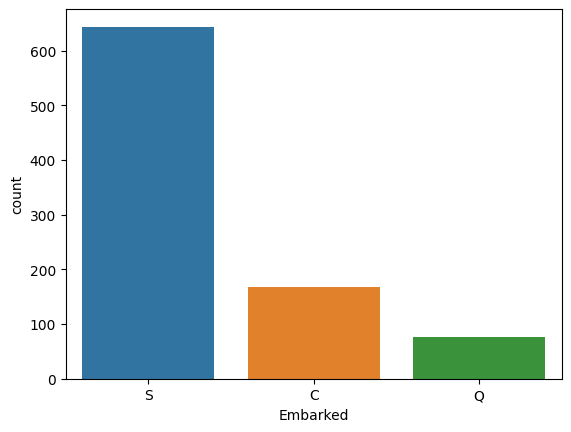

In [49]:
sns.countplot(x='Embarked',data=df_)

<Axes: xlabel='Embarked'>

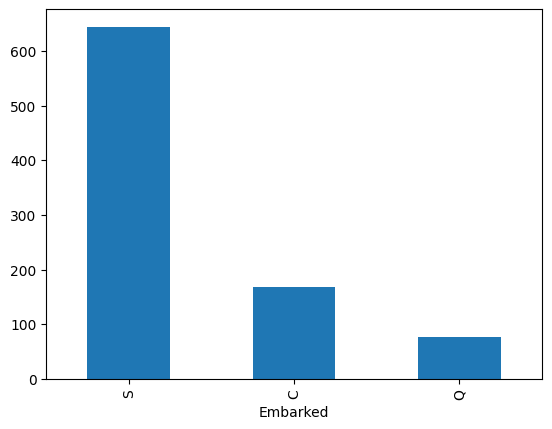

In [50]:
df_['Embarked'].value_counts().plot(kind='bar')

## b. Pie charts

([<matplotlib.patches.Wedge at 0x7f0cf051b430>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.76%'),
  Text(0.26833391225261044, -0.53665343708506, '35.24%')])

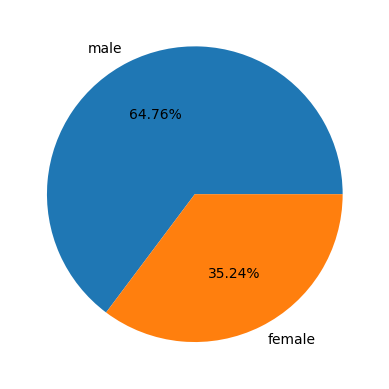

In [51]:
plt.pie(x=df_['Sex'].value_counts(),labels=df_['Sex'].value_counts().index,autopct='%.2f%%')

<Axes: ylabel='count'>

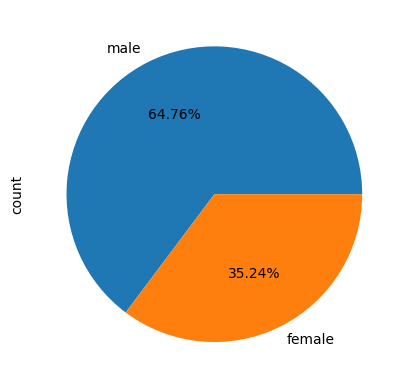

In [52]:
df_['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%')

## c. Paretto Diagrams

  Category  Count  Cumulative  Cumulative Percent
0        3    491         491           55.106622
1        1    216         707           79.349046
2        2    184         891          100.000000


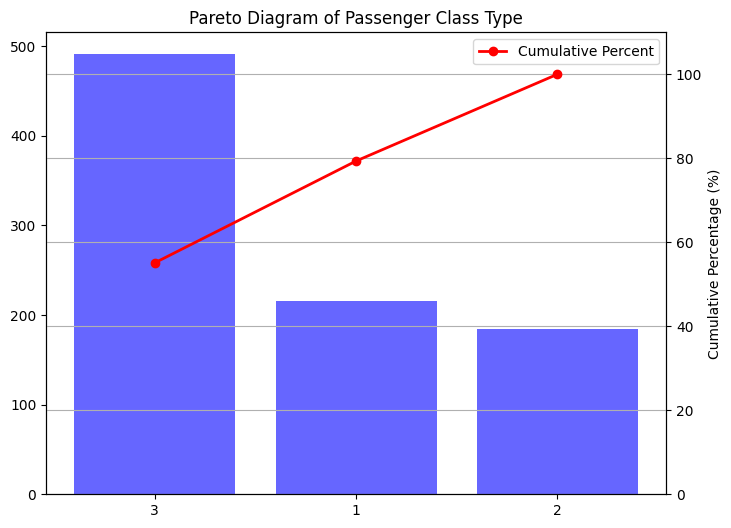

In [53]:
df = pd.DataFrame({
    'Category': df_['Pclass'].value_counts().index.astype(str).to_list(),
    'Count': df_['Pclass'].value_counts().values
})

df = df.sort_values(by='Count', ascending=False)

# Step 2: Calculate cumulative sum and cumulative percentage
df['Cumulative'] = df['Count'].cumsum()
df['Cumulative Percent'] = 100 * df['Cumulative'] / df['Count'].sum()

print(df.head())
# Step 3: Create the Pareto Diagram
plt.figure(figsize=(8, 6))

# Bar plot for individual counts
plt.bar(df['Category'], df['Count'], color='blue', alpha=0.6, label='Count')

# Create a twin axis for the cumulative percentage line
ax2 = plt.gca().twinx()
ax2.plot(df['Category'], df['Cumulative Percent'], color='red', marker='o', label='Cumulative Percent', linewidth=2)

# Add titles and labels
plt.title('Pareto Diagram of Passenger Class Type')
plt.xlabel('Category/Class')
plt.ylabel('Count of Passengers')
ax2.set_ylabel('Cumulative Percentage (%)')

# Set limits for the cumulative percentage axis
ax2.set_ylim(0, 110)

plt.grid(axis='y')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot with proper rotation for x-ticks
plt.xticks(rotation=45)
plt.show()

# 2. Numerical Data

## a. Histogram or Histplot

In [54]:
df_['Age'].max()
bins = [0,18,30,60,df_['Age'].max()]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

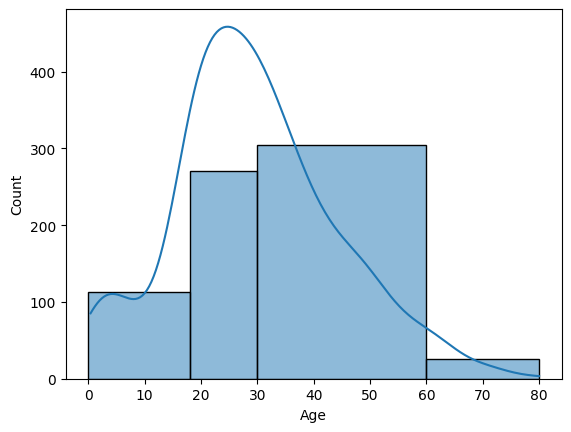

In [55]:
# Dropping NA values
sns.histplot(x=df_['Age'].dropna(),data=df_,bins=bins,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

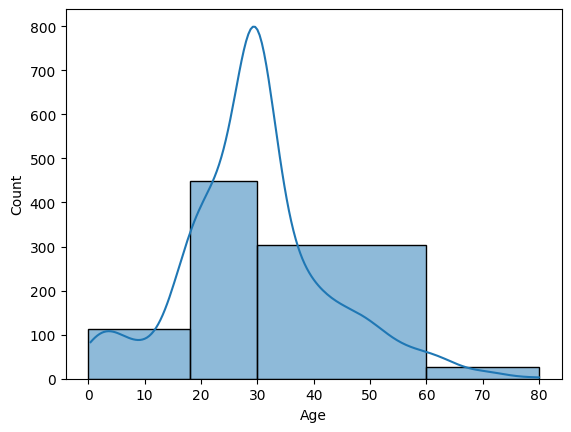

In [56]:
# Imputing NA Values
sns.histplot(x=df_['Age'].fillna(df_['Age'].mean()),data=df_,bins=bins,kde=True)

## b. Displot 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


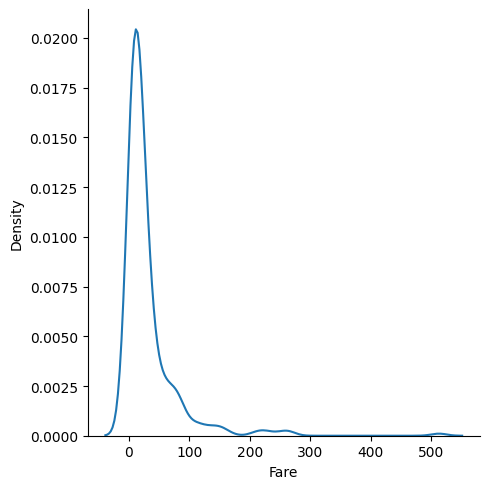

In [57]:
# kde line which tells probabilty.
sns.displot(x=df_['Fare'],data=df_,kind='kde')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


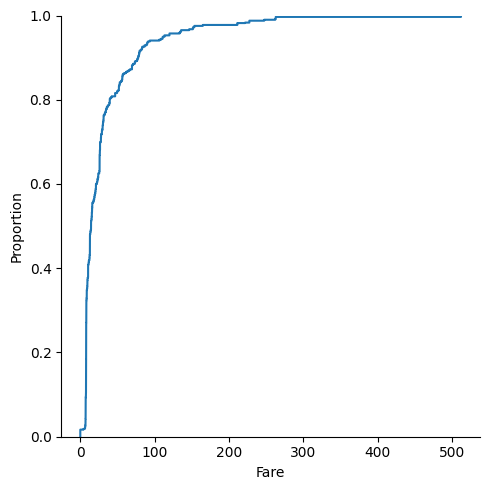

In [58]:
# The ECDF represents the proportion or count of observations falling below each unique value in the dataset. 
# It provides a way to visualize the cumulative distribution of the data.
sns.displot(x=df_['Fare'],data=df_,kind='ecdf')

## c. BoxPlot

<Axes: xlabel='Age'>

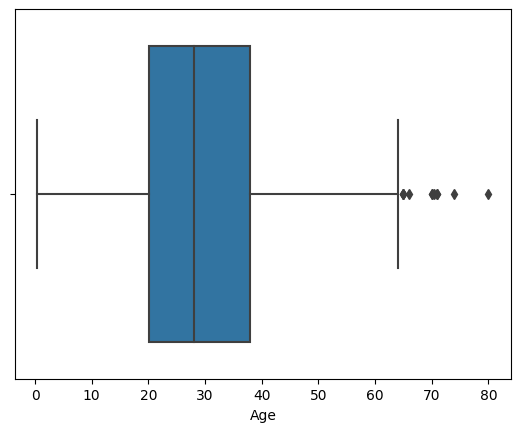

In [59]:
# Dropping NA Values
sns.boxplot(x=df_['Age'].dropna(),data=df_)

<Axes: xlabel='Age'>

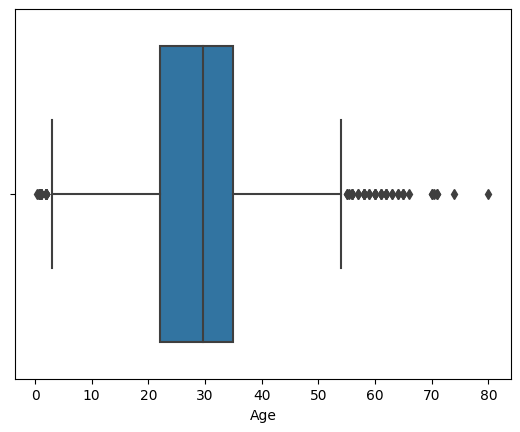

In [60]:
# Imputing NA Values
sns.boxplot(x=df_['Age'].fillna(df_['Age'].mean()),data=df_)